In [1]:
#essential libraries
import pandas as pd
import numpy as np
import time

#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the dataset 
battles=pd.read_csv("battles.csv")
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [3]:
print('SHAPE OF THE DATASET =', battles.shape)
battles.describe()

SHAPE OF THE DATASET = (38, 25)


,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [4]:
battles.corr()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.906781,NaN,NaN,-0.341050,-0.166234,0.155841,-0.366048,-0.841912
battle_number,0.906781,1.000000,NaN,NaN,-0.270421,-0.105225,0.086418,-0.297730,-0.799090
defender_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defender_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_death,-0.341050,-0.270421,NaN,NaN,1.000000,0.264464,0.267966,0.081815,0.337136
major_capture,-0.166234,-0.105225,NaN,NaN,0.264464,1.000000,0.331961,0.249510,0.142112
attacker_size,0.155841,0.086418,NaN,NaN,0.267966,0.331961,1.000000,-0.112118,-0.273054
defender_size,-0.366048,-0.297730,NaN,NaN,0.081815,0.249510,-0.112118,1.000000,0.347108
summer,-0.841912,-0.799090,NaN,NaN,0.337136,0.142112,-0.273054,0.347108,1.000000


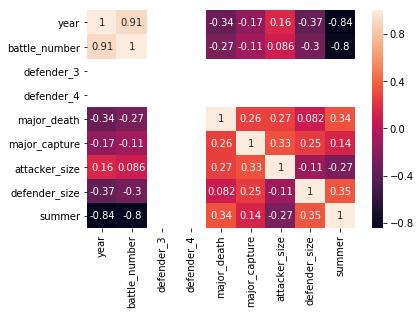

In [5]:
sns.heatmap(battles.corr(), annot=True) # annot= True gives you the values in battle.corr. 

In [6]:
count=battles.groupby('year').sum()
count

,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
year,,,,,,,,
298,28,0.0,0.0,4.0,3.0,55875.0,52745.0,7.0
299,350,0.0,0.0,8.0,6.0,66746.0,59750.0,19.0
300,363,0.0,0.0,1.0,2.0,116000.0,9640.0,0.0


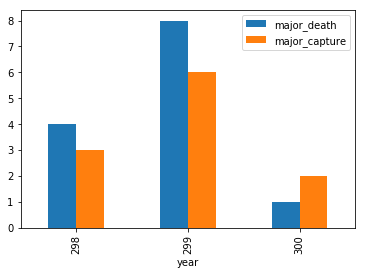

In [7]:
count[['major_death','major_capture']].plot.bar() # to display 2 columns at a time always mention the coulumns in the double squae brackets 

In [8]:
battles['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

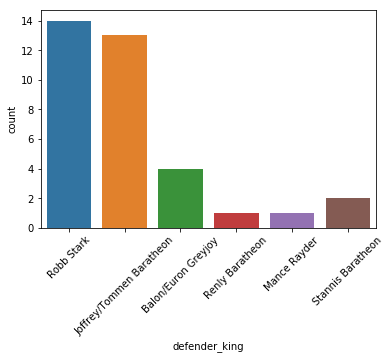

In [9]:
# No.of time each king defended 
sns.countplot(x='defender_king',data=battles)
plt.xticks(rotation=45) # to change the rotation of labels in x-axis

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

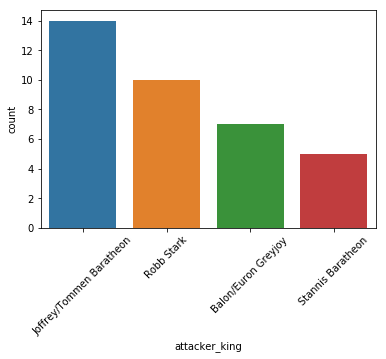

In [10]:
# No. of time each king attacked.
sns.countplot(x="attacker_king", data=battles)
plt.xticks(rotation=45) # to change the rotation of labels in x-axis

In [11]:
battles=battles.drop(['defender_3','defender_4','note'],axis=1)
destruction=battles.groupby('location').sum()
destruction

,year,battle_number,major_death,major_capture,attacker_size,defender_size,summer
location,,,,,,,
Castle Black,300,28,1.0,1.0,100000.0,1240.0,0.0
Crag,299,19,0.0,0.0,6000.0,0.0,1.0
Darry,597,28,0.0,0.0,0.0,0.0,2.0
Deepwood Motte,599,40,0.0,0.0,5500.0,200.0,1.0
Dragonstone,300,35,0.0,0.0,2000.0,0.0,0.0
Duskendale,299,22,1.0,0.0,3000.0,0.0,1.0
Golden Tooth,298,1,1.0,0.0,15000.0,4000.0,1.0
Green Fork,298,4,1.0,1.0,18000.0,20000.0,1.0
Harrenhal,598,43,2.0,0.0,100.0,100.0,2.0


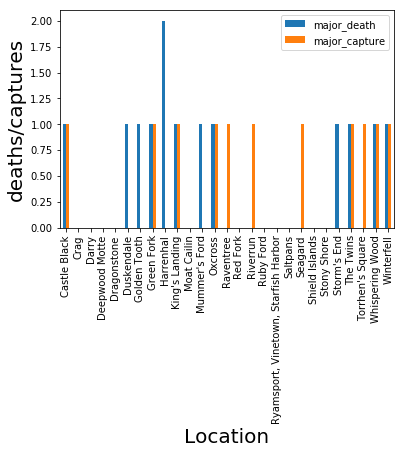

In [12]:
# no. of deaths and captures occured at each location
destruction[['major_death','major_capture']].plot.bar()
plt.xlabel('Location', fontsize=20)
plt.ylabel('deaths/captures', fontsize=20)
plt.show()

In [ ]:
# DEALING WITH THE NUMERICAL FEATURES.

In [ ]:
# Counting the number of unique values in each numerical variable
print('---year---')
print(battles['year'].value_counts())
print('\n')
print('---attacker_size---')
print(battles['attacker_size'].value_counts())
print('\n')
print('---defender_size---')
print(battles['defender_size'].value_counts())
print('---major_death---')

print(battles['major_death'].value_counts())

In [ ]:
#VISUALIZATION

# sorts that specified column in the ascending order. Displays the entire table. 
# battles.sort_values('attacker_size', ascending=True)
battles.boxplot('attacker_size')

In [ ]:
battles.boxplot('defender_size')

In [ ]:
sns.boxplot(battles.attacker_size)

In [ ]:
sns.boxplot(battles.defender_size)

In [ ]:
# CHECKING THE NULL VALUES
print('No. of missing values in year= %s'%(battles['year'].isnull().sum()))
print('No. of missing values in battle_number= %s'%(battles['battle_number'].isnull().sum()))
print('No. of missing values in defender_3 and defender_4= %s and %s'%(battles['defender_3'].isnull().sum(),battles['defender_4'].isnull().sum()))
print('No. of missing values in major_death= %s'%(battles['major_death'].isnull().sum()))
print('No. of missing values in major_capture= %s'%(battles['major_capture'].isnull().sum()))
print('No. of missing values in attacker_size= %s'%(battles['attacker_size'].isnull().sum()))
print('No. of missing values in defender_size= %s'%(battles['defender_size'].isnull().sum()))
print('No. of missing values in summer= %s'%(battles['summer'].isnull().sum()))

In [ ]:
battles['major_death'].fillna(0, inplace=True)

In [ ]:
battles['major_capture'].fillna(0, inplace=True)

In [ ]:
battles['attacker_size'].fillna(4000, inplace=True)

In [ ]:
battles['defender_size'].fillna(6000, inplace=True)

In [ ]:
battles['defender_size'].mode()

In [ ]:
# DEALING WITH CATEGORICAL FEATURES

In [ ]:
print("---attacker_king---")
print('__________________________')
print(battles['attacker_king'].value_counts())
print('\n')
print("---defender_king---")
print('__________________________')
print(battles['defender_king'].value_counts())

In [ ]:
print('---attacker_1---')
print('__________________________')
print(battles['attacker_1'].value_counts())
print('\n')
print('---attacker_2---')
print('__________________________')
print(battles['attacker_2'].value_counts())
print('\n')
print('---attacker_3---')
print('__________________________')
print(battles['attacker_3'].value_counts())
print('\n')
print('---attacker_4---')
print('__________________________')
print(battles['attacker_4'].value_counts())

In [ ]:
print('---defender_1---')
print('__________________________')
print(battles['defender_1'].value_counts())
print('\n')
print('---defender_2---')
print('__________________________')
print(battles['defender_2'].value_counts())
print('\n')
print('---defender_3---')
print('__________________________')
print(battles['defender_3'].value_counts())
print('\n')
print('---defender_4---')
print('__________________________')
print(battles['defender_4'].value_counts())

In [ ]:
print(battles['attacker_outcome'].value_counts())

In [ ]:
print(battles['battle_type'].value_counts())

In [ ]:
print('attacker_commander')
print('_______________________________________________________________________________________________')
print(battles['attacker_commander'].value_counts())
print('\n')
print('defender_commander')
print('_______________________________________________________________________________________________')
print(battles['defender_commander'].value_counts())

In [ ]:
print('location')
print('_______________________________________________________________________________________________')
print(battles['location'].value_counts())
print('\n')
print('region')
print('_______________________________________________________________________________________________')
print(battles['region'].value_counts())

In [ ]:
# CHECKING NULL VALUES

# CHECKING THE NULL VALUES
print('No. of missing values in attacker_king= %s'%(battles['attacker_king'].isnull().sum()))
print('No. of missing values in defender_king= %s'%(battles['defender_king'].isnull().sum()))
print('No. of missing values in attacker_1= %s'%(battles['attacker_1'].isnull().sum()))
print('No. of missing values in attacker_2= %s'%(battles['attacker_2'].isnull().sum()))
print('No. of missing values in attacker_3= %s'%(battles['attacker_3'].isnull().sum()))
print('No. of missing values in attacker_4= %s'%(battles['attacker_4'].isnull().sum()))
print('No. of missing values in defender_1= %s'%(battles['defender_1'].isnull().sum()))
print('No. of missing values in defender_2= %s'%(battles['defender_2'].isnull().sum()))
print('No. of missing values in defender_3= %s'%(battles['defender_3'].isnull().sum()))
print('No. of missing values in defender_4= %s'%(battles['defender_4'].isnull().sum()))
print('No. of missing values in attacker_outcome= %s'%(battles['attacker_outcome'].isnull().sum()))
print('No. of missing values in battle_type= %s'%(battles['battle_type'].isnull().sum()))
print('No. of missing values in attacker_commander= %s'%(battles['attacker_commander'].isnull().sum()))
print('No. of missing values in defender_commander= %s'%(battles['defender_commander'].isnull().sum()))
print('No. of missing values in location= %s'%(battles['location'].isnull().sum()))
print('No. of missing values in region= %s'%(battles['region'].isnull().sum()))

In [ ]:
plt.scatter(battles.battle_number,battles.year, s=10, c='r') # s= size of the dots. 
plt.xlabel('battle_number (Battle ID)')
plt.ylabel('battle_year')

# Most of the battles happened during the  year 299

In [ ]:
sns.catplot('battle_number','year', data=battles)